In [3]:
!module list

Currently Loaded Modulefiles:
  1) archive/2020-11       3) py-bluepysnap/0.6.1   5) py-efel/3.0.80
  2) python/3.7.4          4) py-bluepy/0.14.15     6) julia/1.5.2


In [1]:
!module list

Currently Loaded Modulefiles:
  1) archive/2020-11       3) py-bluepysnap/0.6.1   5) py-efel/3.0.80
  2) python/3.7.4          4) py-bluepy/0.14.15     6) julia/1.5.2


In [1]:
from bluepy.v2 import Simulation

import efel

from bluepy.v2 import Circuit
from bluepy.v2 import Cell
#from bluepy.v2.enums import Synapse

#from os import path

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import pickle as pkl

#import h5py

pd.set_option('display.max_columns', 500)

In [2]:
import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [3]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig')
mc2_cells = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.LAYER,Cell.MTYPE,Cell.ETYPE])
mc2gidsids = {k: v for k, v in enumerate(mc2_cells.index)}

In [4]:
mc2_cells_full = c.cells.get({'$target': 'mc2_Column'})

In [ ]:
classic hoc:

/gpfs/bbp.cscs.ch/project/proj64/home/vangeit/modelmanagement/prod.20171103/mm_runs/run/1810912/output/emodels_hoc/


Camps hoc:
    
/gpfs/bbp.cscs.ch/project/proj34/camps/custom_neurodamus/emodels_dend


My hoc (Camps + changes in ATP and ADP as originally set to 2.2 and 6.3-3):
    
/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/emodels_dend_highATP



In [15]:
mc2_cells_full.loc[[56121, 55216, 55336, 18543, 55886, 55313, 55421],:]

,x,y,z,orientation,etype,layer,me_combo,morph_class,morphology,mtype,region,synapse_class
56121,549.655742,472.539055,502.970601,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",bNAC,6,bNAC_L23NGC_L6_LBC_6_og060901a3_061218_ch7_l6L...,INT,og060901a3_061218_ch7_l6Lbc_100x_-_Scale_x1.00...,L6_LBC,L6,INH
55216,511.879226,123.366905,461.640536,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",bNAC,6,bNAC_L23NGC_L6_LBC_6_og060901a3_061218_ch7_l6L...,INT,og060901a3_061218_ch7_l6Lbc_100x_-_Scale_x1.00...,L6_LBC,L6,INH
55336,344.859874,287.723439,423.237327,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",cNAC,6,cNAC_L4CHC_L6_LBC_6_tkb060530a2_ch5_bc_n_ab_10...,INT,tkb060530a2_ch5_bc_n_ab_100x_1_-_Scale_x1.000_...,L6_LBC,L6,INH
18543,526.031033,1735.339430,457.062352,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",cNAC,3,cNAC_L4CHC_L23_LBC_3_mtC140201B_idB_-_Scale_x1...,INT,mtC140201B_idB_-_Scale_x1.000_y1.050_z1.000_-_...,L23_LBC,L3,INH
55886,501.477328,601.301774,707.231956,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",bAC,6,bAC_L23BTC_L6_LBC_6_og060901a3_061218_ch7_l6Lb...,INT,og060901a3_061218_ch7_l6Lbc_100x_-_Scale_x1.00...,L6_LBC,L6,INH
55313,379.540785,335.634812,683.423539,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",cNAC,6,cNAC_L4CHC_L6_LBC_6_tkb060530a2_ch5_bc_n_ab_10...,INT,tkb060530a2_ch5_bc_n_ab_100x_1_-_Scale_x1.000_...,L6_LBC,L6,INH
55421,478.365637,588.663949,532.832125,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",cNAC,6,cNAC_L4CHC_L6_LBC_6_og060822a1-2_idB_-_Scale_x...,INT,og060822a1-2_idB_-_Scale_x1.000_y1.025_z1.000,L6_LBC,L6,INH


In [7]:
mc2_cells_full.loc[[18543, 38815, 55216, 55313, 55336, 55421, 55886, 56121, 87205, 87258],:]

,x,y,z,orientation,etype,layer,me_combo,morph_class,morphology,mtype,region,synapse_class
18543,526.031033,1735.339430,457.062352,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",cNAC,3,cNAC_L4CHC_L23_LBC_3_mtC140201B_idB_-_Scale_x1...,INT,mtC140201B_idB_-_Scale_x1.000_y1.050_z1.000_-_...,L23_LBC,L3,INH
38815,340.435300,649.582757,519.328608,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",cNAC,6,cNAC_L6BTC_L6_BTC_6_og060523b1-2_idD_-_Clone_3,INT,og060523b1-2_idD_-_Clone_3,L6_BTC,L6,INH
55216,511.879226,123.366905,461.640536,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",bNAC,6,bNAC_L23NGC_L6_LBC_6_og060901a3_061218_ch7_l6L...,INT,og060901a3_061218_ch7_l6Lbc_100x_-_Scale_x1.00...,L6_LBC,L6,INH
55313,379.540785,335.634812,683.423539,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",cNAC,6,cNAC_L4CHC_L6_LBC_6_tkb060530a2_ch5_bc_n_ab_10...,INT,tkb060530a2_ch5_bc_n_ab_100x_1_-_Scale_x1.000_...,L6_LBC,L6,INH
55336,344.859874,287.723439,423.237327,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",cNAC,6,cNAC_L4CHC_L6_LBC_6_tkb060530a2_ch5_bc_n_ab_10...,INT,tkb060530a2_ch5_bc_n_ab_100x_1_-_Scale_x1.000_...,L6_LBC,L6,INH
55421,478.365637,588.663949,532.832125,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",cNAC,6,cNAC_L4CHC_L6_LBC_6_og060822a1-2_idB_-_Scale_x...,INT,og060822a1-2_idB_-_Scale_x1.000_y1.025_z1.000,L6_LBC,L6,INH
55886,501.477328,601.301774,707.231956,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",bAC,6,bAC_L23BTC_L6_LBC_6_og060901a3_061218_ch7_l6Lb...,INT,og060901a3_061218_ch7_l6Lbc_100x_-_Scale_x1.00...,L6_LBC,L6,INH
56121,549.655742,472.539055,502.970601,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",bNAC,6,bNAC_L23NGC_L6_LBC_6_og060901a3_061218_ch7_l6L...,INT,og060901a3_061218_ch7_l6Lbc_100x_-_Scale_x1.00...,L6_LBC,L6,INH
87205,494.422242,415.180069,661.841470,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",cNAC,6,cNAC_L6BTC_L6_NBC_6_tkb060508_b1-b3_idD_-_Scal...,INT,tkb060508_b1-b3_idD_-_Scale_x1.000_y1.025_z1.0...,L6_NBC,L6,INH
87258,254.411731,322.675514,484.894053,"[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...",cNAC,6,cNAC_L23BTC_L6_NBC_6_og061012b_idB_-_Scale_x1....,INT,og061012b_idB_-_Scale_x1.000_y1.050_z1.000_-_C...,L6_NBC,L6,INH


In [15]:
for i in mc2_cells_full.loc[[18543, 38815, 55216, 55313, 55336, 55421, 55886, 56121, 87205,
       87258],'me_combo'].values:
    print(i)

cNAC_L4CHC_L23_LBC_3_mtC140201B_idB_-_Scale_x1.000_y1.050_z1.000_-_Clone_0
cNAC_L6BTC_L6_BTC_6_og060523b1-2_idD_-_Clone_3
bNAC_L23NGC_L6_LBC_6_og060901a3_061218_ch7_l6Lbc_100x_-_Scale_x1.000_y0.975_z1.000_-_Clone_3
cNAC_L4CHC_L6_LBC_6_tkb060530a2_ch5_bc_n_ab_100x_1_-_Scale_x1.000_y0.950_z1.000_-_Clone_2
cNAC_L4CHC_L6_LBC_6_tkb060530a2_ch5_bc_n_ab_100x_1_-_Scale_x1.000_y0.975_z1.000_-_Clone_1
cNAC_L4CHC_L6_LBC_6_og060822a1-2_idB_-_Scale_x1.000_y1.025_z1.000
bAC_L23BTC_L6_LBC_6_og060901a3_061218_ch7_l6Lbc_100x_-_Scale_x1.000_y1.050_z1.000_-_Clone_3
bNAC_L23NGC_L6_LBC_6_og060901a3_061218_ch7_l6Lbc_100x_-_Scale_x1.000_y1.050_z1.000_-_Clone_3
cNAC_L6BTC_L6_NBC_6_tkb060508_b1-b3_idD_-_Scale_x1.000_y1.025_z1.000_-_Clone_2
cNAC_L23BTC_L6_NBC_6_og061012b_idB_-_Scale_x1.000_y1.050_z1.000_-_Clone_2


In [ ]:
cNAC_L4CHC

cNAC_L6BTC

cNAC_L23BTC

bNAC_L23NGC

bAC_L23BTC



In [16]:
for i in mc2_cells_full.loc[[18543, 38815, 55216, 55313, 55336, 55421, 55886, 56121, 87205,87258],'morphology'].values:
    print(i)

mtC140201B_idB_-_Scale_x1.000_y1.050_z1.000_-_Clone_0
og060523b1-2_idD_-_Clone_3
og060901a3_061218_ch7_l6Lbc_100x_-_Scale_x1.000_y0.975_z1.000_-_Clone_3
tkb060530a2_ch5_bc_n_ab_100x_1_-_Scale_x1.000_y0.950_z1.000_-_Clone_2
tkb060530a2_ch5_bc_n_ab_100x_1_-_Scale_x1.000_y0.975_z1.000_-_Clone_1
og060822a1-2_idB_-_Scale_x1.000_y1.025_z1.000
og060901a3_061218_ch7_l6Lbc_100x_-_Scale_x1.000_y1.050_z1.000_-_Clone_3
og060901a3_061218_ch7_l6Lbc_100x_-_Scale_x1.000_y1.050_z1.000_-_Clone_3
tkb060508_b1-b3_idD_-_Scale_x1.000_y1.025_z1.000_-_Clone_2
og061012b_idB_-_Scale_x1.000_y1.050_z1.000_-_Clone_2


In [10]:
mc2_cells_full.loc[2,'me_combo']

'cNAC_L23NGC_L1_DAC_1_sm080529a1-5_idA_-_Scale_x1.000_y0.950_z1.000'

In [4]:
mc2_cells.loc[[ 54893,  44651,  38868,  60919,  84858, 117421,  99305,  92067,
       162880, 122496, 100526, 162034],:]

,x,y,z,synapse_class,layer,mtype,etype
54893,339.218098,302.189011,438.471269,EXC,6,L6_HPC,cADpyr
44651,385.415027,316.669314,433.312554,EXC,6,L6_UPC,cADpyr
38868,233.577330,26.885695,522.337150,INH,6,L6_BTC,cACint
60919,224.309598,646.239845,525.925861,EXC,6,L6_IPC,cADpyr
84858,381.682042,118.171449,602.736898,EXC,6,L6_TPC:C,cADpyr
117421,575.345232,1808.395483,675.208102,INH,2,L23_MC,cACint
99305,478.233626,1304.982495,509.108691,EXC,4,L4_TPC,cADpyr
92067,335.194590,1316.239981,738.994231,EXC,4,L4_UPC,cADpyr
162880,538.858169,728.554732,671.121010,INH,5,L5_MC,bAC
122496,486.221438,1871.267043,631.119026,EXC,2,L2_TPC:B,cADpyr


In [5]:
#/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/nomet_nostim_02jan2021

#sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/freq_coupl_ms/BlueConfig')
#sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/test_nan/BlueConfig')


#soma,NaConc,ATPConc,KConc,CaConc
#sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/other/met_gen_nostim/BlueConfig')
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/sim/setup_sim/sim4fig/test/BlueConfig')


In [93]:
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/sim/setup_sim/sim4fig/gen_diff_pulses/linamp1long/BlueConfig')

In [31]:
report = sim.report('KConcAllCmps', source='h5')
KConcAllCmps = report.get()
KConcAllCmps = KConcAllCmps.reset_index()


`brain` module not found. Using experimental fallback implementation for H5 report access.


In [32]:
report = sim.report('NaConcAllCmps', source='h5')
NaConcAllCmps = report.get()
NaConcAllCmps = NaConcAllCmps.reset_index()


`brain` module not found. Using experimental fallback implementation for H5 report access.


In [6]:
report = sim.report('ATPConcAllCmps', source='h5')
ATPConcAllCmps = report.get()
ATPConcAllCmps = ATPConcAllCmps.reset_index()


`brain` module not found. Using experimental fallback implementation for H5 report access.


In [34]:
ATPConcAllCmps[ATPConcAllCmps.isna().any(axis=1)]

gid,time,2,3,6,11,21,31,39,48,49,83,103,109,119,123,124,126,130,131,132,135,138,156,191,193,197,228,237,246,249,254,270,277,286,292,298,300,313,314,315,330,332,339,347,348,361,386,392,398,402,415,422,427,430,443,450,455,459,466,468,469,480,500,501,519,520,522,531,534,538,547,553,562,563,587,609,610,613,630,635,644,649,659,664,689,693,702,704,705,724,730,733,749,753,760,769,775,779,783,790,795,806,810,823,830,843,844,846,855,856,857,874,876,887,888,897,900,918,923,927,929,934,935,948,954,956,961,973,979,984,999,1001,1004,1024,1029,1035,1043,1044,1047,1049,1054,1060,1061,1062,1064,1078,1079,1085,1092,1097,1107,1118,1133,1138,1144,1154,1157,1160,1167,1168,1170,1174,1175,1176,1182,1183,1188,1201,1218,1228,1244,1247,1251,1252,1257,1262,1265,1268,1285,1297,1308,1312,1323,1325,1329,1339,1352,1357,1361,1373,1383,1386,1389,1390,1398,1402,1403,1408,1412,1428,1438,1445,1447,1449,1459,1466,1470,1471,1473,1475,1477,1486,1491,1494,1496,1504,1505,1528,1536,1541,1550,1555,1559,1567,1568,1579,1587,1597,1599,1611,1617,1620,1623,1625,1642,1643,1649,1658,1672,1681,1684,1700,1707,1722,1731,1736,1748,1755,1757,1784,...,161460,161466,161481,161490,161500,161511,161513,161521,161527,161532,161536,161541,161561,161563,161579,161587,161597,161603,161607,161608,161612,161616,161617,161628,161632,161633,161637,161640,161651,161653,161659,161667,161673,161676,161678,161683,161689,161705,161706,161711,161718,161726,161727,161757,161760,161779,161782,161788,161790,161792,161801,161806,161809,161830,161837,161852,161867,161891,161904,161909,161917,161925,161938,161948,161953,161957,161962,161976,161987,161991,162009,162020,162027,162034,162040,162042,162045,162053,162083,162085,162095,162097,162105,162110,162113,162114,162119,162127,162133,162156,162157,162158,162172,162183,162192,162194,162203,162209,162215,162223,162225,162241,162242,162244,162247,162268,162272,162283,162286,162291,162293,162297,162313,162316,162334,162336,162344,162345,162359,162380,162384,162390,162396,162402,162409,162410,162412,162419,162420,162421,162439,162444,162448,162450,162466,162468,162471,162472,162476,162477,162478,162495,162498,162499,162516,162517,162529,162542,162564,162565,162568,162576,162599,162604,162646,162653,162654,162660,162666,162667,162669,162672,162676,162699,162704,162709,162715,162721,162728,162738,162739,162746,162747,162755,162759,162765,162769,162797,162799,162804,162811,162812,162814,162818,162824,162825,162826,162834,162836,162859,162860,162864,162870,162872,162875,162880,162882,162883,162887,162888,162889,162903,162908,162917,162920,162922,162928,162934,162942,162950,162951,162953,162956,162966,162976,163006,163022,163027,163031,163038,163046,163050,163064,163089,163101,163107,163111,163117,163133,163148,163161,163168,163170,163173,163176,163190,163194,163199,163206,163207,163211,163221,163231,163241,163250,163254,163255,163257,163260,163263


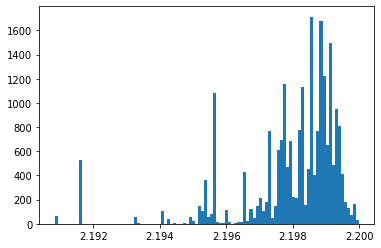

In [5]:
#test
plt.hist(ATPConcAllCmps.loc[ATPConcAllCmps['time']==1,mc2_cells.index],bins=100)
plt.show()

/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/gcc-8.3.0/py-numpy-1.17.3-edmewrnybo/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/gcc-8.3.0/py-numpy-1.17.3-edmewrnybo/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


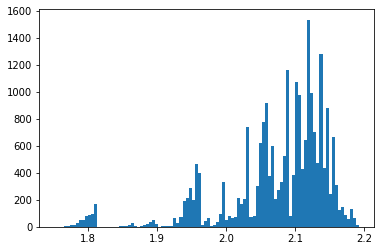

In [6]:
#test
plt.hist(ATPConcAllCmps.loc[ATPConcAllCmps['time']==ATPConcAllCmps['time'].max(),mc2_cells.index],bins=100)
plt.show()

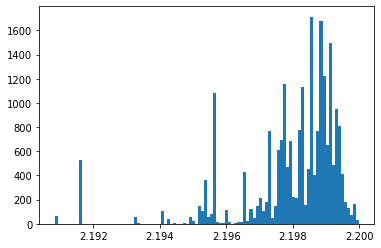

In [13]:
#no stim
plt.hist(ATPConcAllCmps.loc[ATPConcAllCmps['time']==1,mc2_cells.index],bins=100)
plt.show()

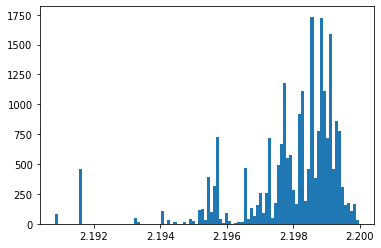

In [36]:
#lin1
plt.hist(ATPConcAllCmps.loc[ATPConcAllCmps['time']==1,mc2_cells.index],bins=100)
plt.show()

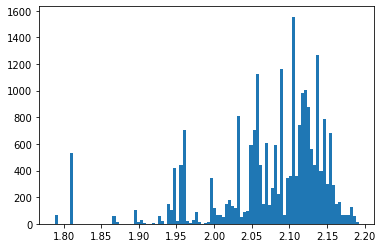

In [10]:
#no stim
plt.hist(ATPConcAllCmps.loc[ATPConcAllCmps['time']==ATPConcAllCmps['time'].max(),mc2_cells.index],bins=100)
plt.show()

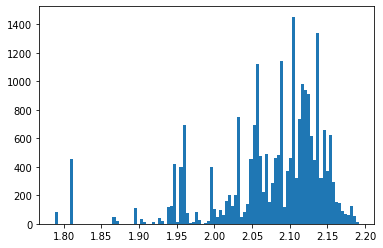

In [37]:
#lin1
plt.hist(ATPConcAllCmps.loc[ATPConcAllCmps['time']==ATPConcAllCmps['time'].max(),mc2_cells.index],bins=100)
plt.show()

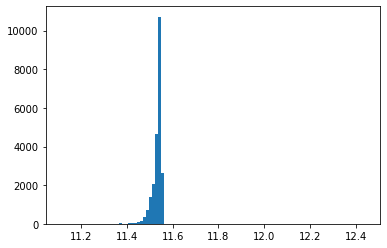

In [29]:
plt.hist(NaConcAllCmps.loc[NaConcAllCmps['time']==NaConcAllCmps['time'].max(),mc2_cells.index],bins=100)
plt.show()

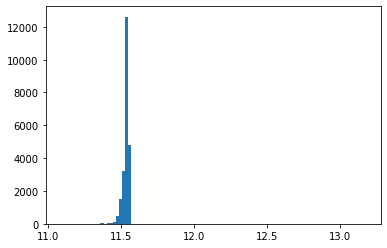

In [38]:
#lin1
plt.hist(NaConcAllCmps.loc[NaConcAllCmps['time']==NaConcAllCmps['time'].max(),mc2_cells.index],bins=100)
plt.show()

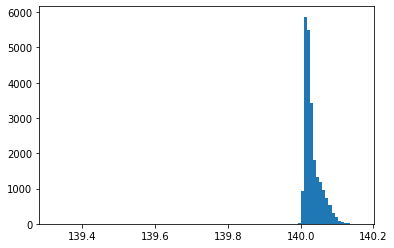

In [22]:
plt.hist(KConcAllCmps.loc[KConcAllCmps['time']==KConcAllCmps['time'].max(),mc2_cells.index],bins=100)
plt.show()

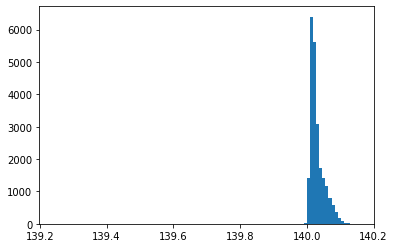

In [39]:
#lin1
plt.hist(KConcAllCmps.loc[KConcAllCmps['time']==KConcAllCmps['time'].max(),mc2_cells.index],bins=100)
plt.show()

In [16]:
min(ATPConcAllCmps.iloc[:,1:len(ATPConcAllCmps.columns)].min())

1.650972843170166

In [40]:
#lin1
min(ATPConcAllCmps.iloc[:,1:len(ATPConcAllCmps.columns)].min())

1.6504024267196655

In [17]:
min(KConcAllCmps.iloc[:,1:len(KConcAllCmps.columns)].min())

138.2308349609375

In [41]:
#lin1
min(KConcAllCmps.iloc[:,1:len(KConcAllCmps.columns)].min())

138.2777862548828

In [18]:
max(KConcAllCmps.iloc[:,1:len(KConcAllCmps.columns)].max())

140.18528747558594

In [42]:
#lin1
max(KConcAllCmps.iloc[:,1:len(KConcAllCmps.columns)].max())

140.19142150878906

In [19]:
min(NaConcAllCmps.iloc[:,1:len(NaConcAllCmps.columns)].min())

9.84661865234375

In [43]:
#lin1
min(NaConcAllCmps.iloc[:,1:len(NaConcAllCmps.columns)].min())

9.846611022949219

In [20]:
max(NaConcAllCmps.iloc[:,1:len(NaConcAllCmps.columns)].max())

12.462843894958496

In [44]:
#lin1
max(NaConcAllCmps.iloc[:,1:len(NaConcAllCmps.columns)].max())

13.189740180969238

In [ ]:
# ATP consumption rate

In [31]:
atp_t = ATPConcAllCmps.transpose()
atp_t.columns = atp_t.loc['time',:]
atp_t.drop(atp_t.index[0], inplace=True)

atp_t = atp_t.reset_index()

In [33]:
atp_t.loc[atp_t.isna().any(axis=1),'gid'].unique()

array([18543, 38815, 55216, 55313, 55336, 55421, 55886, 56121, 87205,
       87258])

In [47]:
mc2_cells = mc2_cells.reset_index()

In [48]:
mc2_cells.loc[mc2_cells['index'].isin(atp_t.loc[atp_t.isna().any(axis=1),'gid'].unique()),:]

,index,x,y,z,synapse_class,layer,mtype,etype


In [50]:
atp_t.head()

time,gid,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,...,4750.0,4751.0,4752.0,4753.0,4754.0,4755.0,4756.0,4757.0,4758.0,4759.0,4760.0,4761.0,4762.0,4763.0,4764.0,4765.0,4766.0,4767.0,4768.0,4769.0,4770.0,4771.0,4772.0,4773.0,4774.0,4775.0,4776.0,4777.0,4778.0,4779.0,4780.0,4781.0,4782.0,4783.0,4784.0,4785.0,4786.0,4787.0,4788.0,4789.0,4790.0,4791.0,4792.0,4793.0,4794.0,4795.0,4796.0,4797.0,4798.0,4799.0,4800.0,4801.0,4802.0,4803.0,4804.0,4805.0,4806.0,4807.0,4808.0,4809.0,4810.0,4811.0,4812.0,4813.0,4814.0,4815.0,4816.0,4817.0,4818.0,4819.0,4820.0,4821.0,4822.0,4823.0,4824.0,4825.0,4826.0,4827.0,4828.0,4829.0,4830.0,4831.0,4832.0,4833.0,4834.0,4835.0,4836.0,4837.0,4838.0,4839.0,4840.0,4841.0,4842.0,4843.0,4844.0,4845.0,4846.0,4847.0,4848.0,4849.0,4850.0,4851.0,4852.0,4853.0,4854.0,4855.0,4856.0,4857.0,4858.0,4859.0,4860.0,4861.0,4862.0,4863.0,4864.0,4865.0,4866.0,4867.0,4868.0,4869.0,4870.0,4871.0,4872.0,4873.0,4874.0,4875.0,4876.0,4877.0,4878.0,4879.0,4880.0,4881.0,4882.0,4883.0,4884.0,4885.0,4886.0,4887.0,4888.0,4889.0,4890.0,4891.0,4892.0,4893.0,4894.0,4895.0,4896.0,4897.0,4898.0,4899.0,4900.0,4901.0,4902.0,4903.0,4904.0,4905.0,4906.0,4907.0,4908.0,4909.0,4910.0,4911.0,4912.0,4913.0,4914.0,4915.0,4916.0,4917.0,4918.0,4919.0,4920.0,4921.0,4922.0,4923.0,4924.0,4925.0,4926.0,4927.0,4928.0,4929.0,4930.0,4931.0,4932.0,4933.0,4934.0,4935.0,4936.0,4937.0,4938.0,4939.0,4940.0,4941.0,4942.0,4943.0,4944.0,4945.0,4946.0,4947.0,4948.0,4949.0,4950.0,4951.0,4952.0,4953.0,4954.0,4955.0,4956.0,4957.0,4958.0,4959.0,4960.0,4961.0,4962.0,4963.0,4964.0,4965.0,4966.0,4967.0,4968.0,4969.0,4970.0,4971.0,4972.0,4973.0,4974.0,4975.0,4976.0,4977.0,4978.0,4979.0,4980.0,4981.0,4982.0,4983.0,4984.0,4985.0,4986.0,4987.0,4988.0,4989.0,4990.0,4991.0,4992.0,4993.0,4994.0,4995.0,4996.0,4997.0,4998.0,4999.0
0,2,2.199999,2.199215,2.198431,2.197646,2.196862,2.196078,2.195295,2.194511,2.193728,2.192945,2.192162,2.191379,2.190596,2.189814,2.189032,2.188251,2.187469,2.186688,2.185907,2.185127,2.184347,2.183567,2.182787,2.182008,2.181229,2.180450,2.179672,2.178894,2.178117,2.177339,2.176562,2.175786,2.175009,2.174233,2.173457,2.172682,2.171907,2.171132,2.170357,2.169583,2.168809,2.168036,2.167263,2.166490,2.165717,2.164945,2.164173,2.163401,2.162630,2.161859,2.161088,2.191810,2.191036,2.190262,2.189487,2.188711,2.187935,2.187158,2.186380,2.185601,2.184822,2.184043,2.183263,2.182483,2.181703,2.180923,2.180142,2.179362,2.178582,2.177802,2.177022,2.176243,2.175463,2.174684,2.173905,2.173126,2.172348,2.171570,2.170793,2.170016,2.169239,2.168462,2.167686,2.166910,2.166134,2.165359,2.164585,2.163810,2.163036,2.162263,2.161489,2.160717,2.159944,2.159172,2.1

In [51]:
atp_mean = atp_t.loc[:,['gid']].copy()

#for i in range(duration_in_seconds):
atp_mean['atp_rate']  = (atp_t.iloc[:,2500] - atp_t.iloc[:,1500]) #/0.5  # 1000 because atpi DT = 1

In [35]:
#atp_mean['atp_rate_end']  = (atp_t.iloc[:,451] - atp_t.iloc[:,401])/0.5  # 1000 because atpi DT = 1

In [52]:
atp_mean.loc[atp_mean['gid']==55336,:].head()

time,gid,atp_rate
7733,55336,0.000418


In [53]:
atp_mean_m = atp_mean[['gid','atp_rate']].groupby('gid').mean()

In [54]:
atp_mean_m = atp_mean_m.reset_index()

In [55]:
k_t = KConcAllCmps.transpose()
k_t.columns = k_t.loc['time',:]
k_t.drop(k_t.index[0], inplace=True)

k_t = k_t.reset_index()

k_mean = k_t.loc[:,['gid']].copy()

#for i in range(duration_in_seconds):
k_mean['delta']  = (k_t.iloc[:,2500] - k_t.iloc[:,1500]) #/1 #/0.5 # 1000 because atpi DT = 1

In [56]:
atp_k = pd.merge(atp_mean_m, k_mean, left_on='gid',right_on ='gid',how='inner'  )

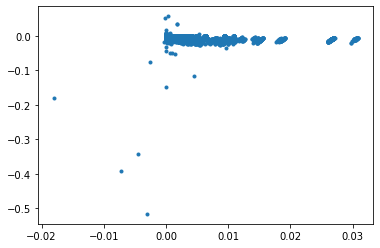

In [59]:
plt.plot(atp_k['atp_rate'],atp_k['delta'],'.')
plt.show()

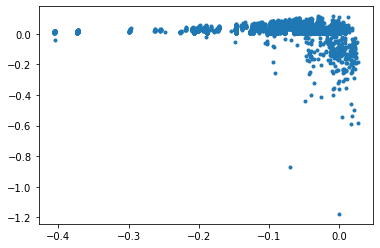

In [47]:
plt.plot(atp_k['atp_rate'],atp_k['delta'],'.')
plt.show()

! ls -lh /gpfs/bbp.cscs.ch/project/proj34/scratch/polina

In [5]:
#glut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/nomet_nostim_noSkip_outs_r_glut_2021021215.txt",sep='\t',header=None)
#gaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/nomet_nostim_noSkip_outs_r_gaba_2021021215.txt",sep='\t',header=None)

glut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/test_outs_r_glut_2021022408.txt",sep='\t',header=None)
gaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/test_outs_r_gaba_2021022408.txt",sep='\t',header=None)


glut.columns = ['idxm','c_gid','glut_releases_per_pre']
gaba.columns = ['idxm','c_gid','gaba_releases_per_pre']


In [6]:
#postglut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ins_r_glut_highATP_2021020514.txt",sep='\t',header=None)
#postgaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/ins_r_gaba_highATP_2021020514.txt",sep='\t',header=None)

postglut = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/test_ins_r_glut_2021022408.txt",sep='\t',header=None)
postgaba = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/test_ins_r_gaba_2021022408.txt",sep='\t',header=None)


postglut.columns = ['idxm','rank','c_gid','glut_releases_received_per_post']
postgaba.columns = ['idxm','rank','c_gid','gaba_releases_received_per_post']


In [7]:
releases_pre = pd.merge(glut,gaba,how='inner',on=['idxm','c_gid'])
releases_post = pd.merge(postglut,postgaba,how='inner',on=['idxm','c_gid'])

releases_all = pd.merge(releases_pre,releases_post,how='inner',on=['idxm','c_gid'])

In [8]:
releases_all = releases_all.drop(columns=['rank_x','rank_y'])

In [26]:
releases_all.head()

,idxm,c_gid,glut_releases_per_pre,gaba_releases_per_pre,glut_releases_received_per_post,gaba_releases_received_per_post
0,0,292,231.0,0.0,64.0,17.0
1,0,443,223.0,0.0,83.0,36.0
2,0,468,446.0,0.0,34.0,2.0
3,0,469,124.0,0.0,21.0,10.0
4,0,779,256.0,0.0,178.0,80.0


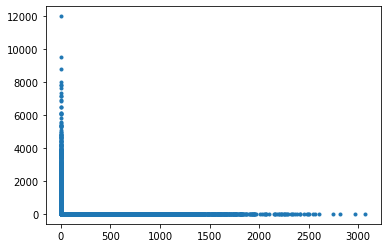

In [28]:
plt.plot(releases_all['glut_releases_per_pre'],releases_all['gaba_releases_per_pre'],'.')
plt.show()

In [166]:
sol_err = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen_nostim_solver_errors_2021021916.txt",sep='\t',header=None)
sol_err.columns = ['rank','c_gid']
sol_err = sol_err.drop_duplicates(keep='first')

In [167]:
len(sol_err['c_gid'].unique())

8

In [168]:
sol_err['c_gid'].unique()

array([ 15859,   5564,  16948,   4149,  99720,  86072, 108232, 113002])

In [169]:
param.loc[(param['c_gid'].isin([ 15859,   5564,  16948,   4149,  99720,  86072, 108232, 113002]))&(param['idxm']==param['idxm'].max()-1),]

,c_gid,rank,idxm,ina_density,const_ksi,voltages_per_gids,nais_mean,kis_mean,ik_density,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,cells_volumes_um3
80,4149,591,0,-0.012170,0.06,-80.0,10.507128,139.106277,0.007639,4.1,0.17,1.864629,2.18,0.000126,0.826873,0.1,0.000018,2116.963634
832,15859,2225,0,-0.010455,0.06,-80.0,10.307621,139.592767,0.014584,4.1,0.17,2.078067,2.18,0.000133,0.826873,0.1,0.000008,3306.886785
2379,5564,787,0,-0.260806,0.06,-80.0,10.378021,139.450664,0.266714,4.1,0.17,2.046913,2.18,0.000132,0.826873,0.1,0.000007,3342.789699
2487,16948,2392,0,-0.005945,0.06,-80.0,10.142932,139.829193,0.010283,4.1,0.17,1.988344,2.18,0.000089,0.826873,0.1,0.000004,3292.059148
14157,108232,2347,0,-0.020143,0.06,-72.0,10.196887,139.734250,0.015756,4.1,0.17,2.069839,2.18,0.000173,1.000000,0.1,0.000006,12625.146217
16073,86072,1810,0,-0.017286,0.06,-72.0,10.196369,139.725369,0.011722,4.1,0.17,2.155355,2.18,0.000319,0.520672,0.1,0.000003,2376.731426
16761,99720,1161,0,-0.018276,0.06,-72.0,10.376850,139.389467,0.022345,4.1,0.17,2.085569,2.18,0.000183,1.000000,0.1,0.000004,6114.934806
16789,113002,447,0,-0.007402,0.06,-80.0,10.245355,139.546169,0.003083,4.1,0.17,1.949308,2.18,0.000103,0.674419,0.1,0.000003,1815.376491


In [10]:
glut.head()

,idxm,c_gid,releases
0,0,292,231.0
1,0,443,223.0
2,0,468,446.0
3,0,469,124.0
4,0,779,256.0


In [11]:
gaba.head()

,idxm,c_gid,releases
0,0,292,0.0
1,0,443,0.0
2,0,468,0.0
3,0,469,0.0
4,0,779,0.0


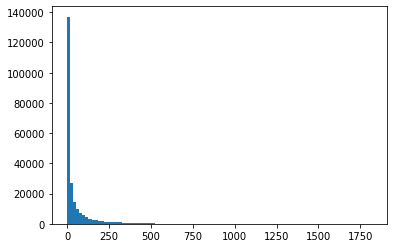

In [12]:
plt.hist(postglut['releases'],bins = 100)
plt.show()

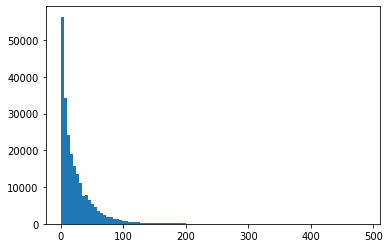

In [13]:
plt.hist(postgaba['releases'],bins = 100)
plt.show()

In [14]:
glut['idxm'].unique()

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

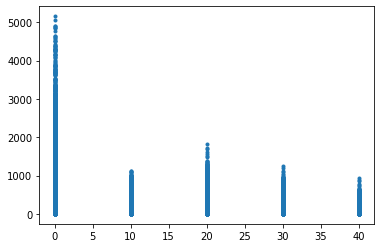

In [105]:
plt.plot(glut['idxm'],glut['releases'],'.')
plt.show()

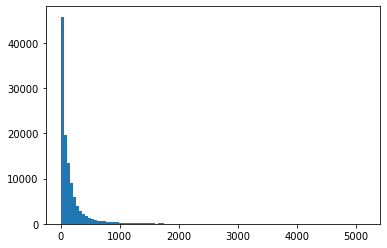

In [77]:
plt.hist(glut['releases'],bins = 100)
plt.show()

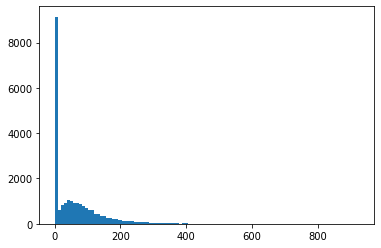

In [78]:
plt.hist(glut.loc[glut['idxm']==glut['idxm'].max(),'releases'],bins = 100)
plt.show()

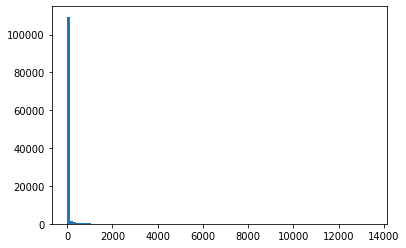

In [79]:
plt.hist(gaba['releases'],bins = 100)
plt.show()

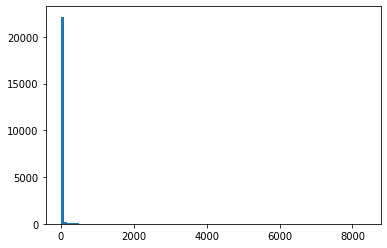

In [80]:
plt.hist(gaba.loc[gaba['idxm']==gaba['idxm'].max(),'releases'],bins = 100)
plt.show()

In [9]:
#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/oldSetup_met_gen_nostim_param_2021021915.txt",sep=', ',header=None)
#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/param_gen_thal_1to4_12jan2021.txt",sep=', ',header=None)

#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/test_param_2021022408.txt",sep='\t',header=None)

#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen5_param_2021022511.txt",sep='\t',header=None)

#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen_thal_param_2021022520.txt",sep='\t',header=None)
#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen5_param_2021022518.txt",sep='\t',header=None)          #last worked

param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/test_param_2021022408.txt",sep='\t',header=None)



#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/param_memTest_2021020407.txt",sep='\t',header=None)

#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/param_gen_nostim_v2_20jan2021.txt",sep='\t',header=None)

#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/param_gen_nostim_18jan2021.txt",sep='\t',header=None)
#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/param_gen_nostim_v22_18jan2021.txt",sep='\t',header=None)

#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/param_gen_nostim_15jan2021.txt",sep='\t',header=None)

#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/param_gen_freq_coupl_ms_14jan2021.txt",sep=', ',header=None)

#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/param_gen_nostim_highATP_13jan2021.txt",sep=', ',header=None)


#param.columns = ['c_gid','rank','idxm','current_density_ina','const_ksi','voltage_mean','nais_mean','kis_mean','current_density_ik','const41','pAKTPFK2',
#                'atpi_mean','atp_vm27','cais_mean','mito_scale','glutamatergic_gaba_scaling','outs_r_to_met','current_ina_nA','cells_volumes_um3','cells_areas_um2']

In [4]:
#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen5_param_2021022511.txt",sep='\t',header=None)


In [ ]:
param.columns = ['c_gid','rank','idxm',
                 'ina_density', 'const_ksi', 'voltages_per_gids', 'nais_mean', 'kis_mean', 
                 'ik_density', 'const41','pAKTPFK2', 'atpi_mean','atp_vm27','cais_mean','mito_scale','glutamatergic_gaba_scaling','outs_r_to_met','current_ina_nA',
                 'cells_volumes_um3','areas']



In [11]:
param.columns = ['c_gid','rank','idxm',
                 'ina_density', 'const_ksi', 'voltages_per_gids', 'nais_mean', 'kis_mean', 
                 'ik_density', 'const41','pAKTPFK2', 'atpi_mean','atp_vm27','cais_mean','mito_scale','glutamatergic_gaba_scaling','outs_r_to_met',
               'cells_volumes_um3']



In [12]:
param.head()

,c_gid,rank,idxm,ina_density,const_ksi,voltages_per_gids,nais_mean,kis_mean,ik_density,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,cells_volumes_um3
0,1536,217,0,-0.008312,0.06,-65.0,10.386600,139.405420,0.008757,4.1,0.17,2.117052,2.18,0.000139,0.826873,0.1,0.000021,2214.949744
1,1555,220,0,-0.003758,0.06,-65.0,10.174354,139.747001,0.002872,4.1,0.17,2.103724,2.18,0.000089,0.826873,0.1,0.000005,3306.701679
2,1658,236,0,-0.012418,0.06,-65.0,10.494742,139.130699,0.007984,4.1,0.17,1.995191,2.18,0.000136,0.826873,0.1,0.000043,3337.399723
3,1579,224,0,-0.015331,0.06,-65.0,10.331434,139.520577,0.014901,4.1,0.17,2.035563,2.18,0.000148,0.826873,0.1,0.000019,2945.050273
4,1620,230,0,-0.009524,0.06,-65.0,10.175034,139.720755,0.004889,4.1,0.17,2.086681,2.18,0.000084,0.826873,0.1,0.000003,3171.643046


In [7]:
param.loc[param['idxm']==param['idxm'].max()].head()

,c_gid,rank,idxm,ina_density,const_ksi,voltages_per_gids,nais_mean,kis_mean,ik_density,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,cells_volumes_um3
389563,613,76,17,-0.015930,0.06,-65.0,11.594259,139.829861,0.019439,4.1,0.17,1.954206,2.1863,0.000135,0.826873,0.1,1.366082e-06,3550.664775
389564,948,122,17,-0.000386,0.06,-65.0,11.460244,139.958565,0.000264,4.1,0.17,1.915542,2.1863,0.000083,0.826873,0.1,0.000000e+00,3106.126070
389565,2043,283,17,-0.001469,0.06,-65.0,12.101188,138.948803,0.000709,4.1,0.17,1.207317,2.1863,0.000131,0.826873,0.1,6.895022e-06,2601.905942
389566,1909,269,17,0.000021,0.06,-65.0,11.456140,140.004767,-0.000064,4.1,0.17,1.934645,2.1863,0.000078,0.826873,0.1,2.675192e-08,4967.508364
389567,298,34,17,-0.016400,0.06,-65.0,11.643514,139.766615,0.016515,4.1,0.17,1.686097,2.1863,0.000106,0.826873,0.1,1.523010e-06,3228.438519


In [33]:
releases_all.head()

,idxm,c_gid,glut_releases_per_pre,gaba_releases_per_pre,glut_releases_received_per_post,gaba_releases_received_per_post
0,0,292,231.0,0.0,64.0,17.0
1,0,443,223.0,0.0,83.0,36.0
2,0,468,446.0,0.0,34.0,2.0
3,0,469,124.0,0.0,21.0,10.0
4,0,779,256.0,0.0,178.0,80.0


In [14]:
releases_params = pd.merge(param,releases_all,how='inner',on=['idxm','c_gid'])

In [15]:
releases_params.head()

,c_gid,rank,idxm,ina_density,const_ksi,voltages_per_gids,nais_mean,kis_mean,ik_density,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,cells_volumes_um3,glut_releases_per_pre,gaba_releases_per_pre,glut_releases_received_per_post,gaba_releases_received_per_post
0,1536,217,0,-0.008312,0.06,-65.0,10.386600,139.405420,0.008757,4.1,0.17,2.117052,2.18,0.000139,0.826873,0.1,0.000021,2214.949744,345.0,0.0,130.0,27.0
1,1555,220,0,-0.003758,0.06,-65.0,10.174354,139.747001,0.002872,4.1,0.17,2.103724,2.18,0.000089,0.826873,0.1,0.000005,3306.701679,112.0,0.0,97.0,39.0
2,1658,236,0,-0.012418,0.06,-65.0,10.494742,139.130699,0.007984,4.1,0.17,1.995191,2.18,0.000136,0.826873,0.1,0.000043,3337.399723,1075.0,0.0,164.0,45.0
3,1579,224,0,-0.015331,0.06,-65.0,10.331434,139.520577,0.014901,4.1,0.17,2.035563,2.18,0.000148,0.826873,0.1,0.000019,2945.050273,431.0,0.0,165.0,27.0
4,1620,230,0,-0.009524,0.06,-65.0,10.175034,139.720755,0.004889,4.1,0.17,2.086681,2.18,0.000084,0.826873,0.1,0.000003,3171.643046,77.0,0.0,82.0,33.0


In [40]:
releases_params['releases_per_pre'] = releases_params['glut_releases_per_pre'] + releases_params['gaba_releases_per_pre'] 

releases_params['releases_per_post'] = releases_params['glut_releases_received_per_post'] + releases_params['gaba_releases_received_per_post'] 

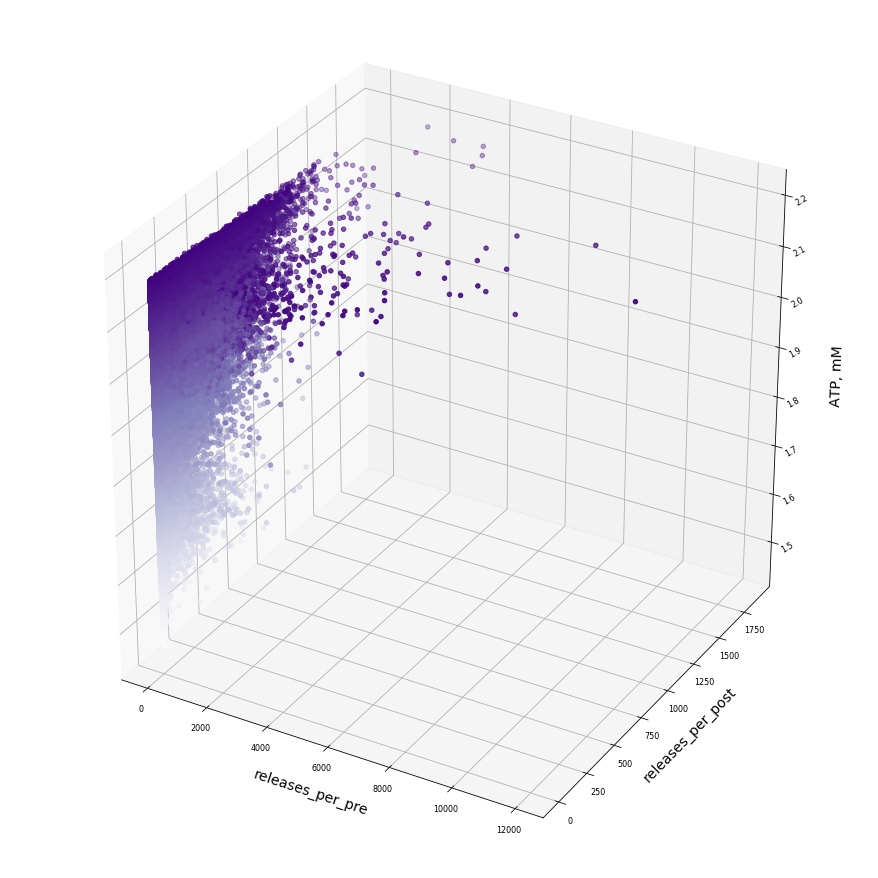

In [48]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

xs = releases_params['releases_per_pre']
ys = releases_params['releases_per_post']
zs = releases_params['atpi_mean']

ax.scatter(xs, ys, zs, marker='o',c=zs, cmap=plt.cm.Purples)


ax.set_xlabel('releases_per_pre',labelpad=10,fontsize=14)
ax.set_ylabel('releases_per_post',labelpad=10,fontsize=14)
ax.set_zlabel('ATP, mM',labelpad=21,fontsize=14)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="z", labelsize=8, labelrotation=30)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.pdf')
fig.savefig('plots/ATPvsReleases_3d_genMetabNostim.png')


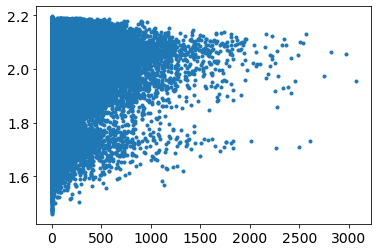

In [16]:
plt.plot(releases_params['glut_releases_per_pre'],releases_params['atpi_mean'],'.')
plt.show()

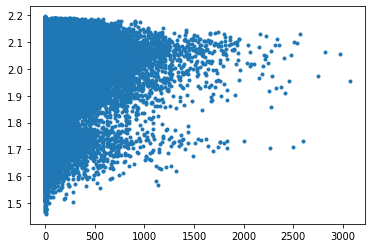

In [36]:
plt.plot(releases_params['glut_releases_per_pre'],releases_params['atpi_mean'],'.')
plt.show()

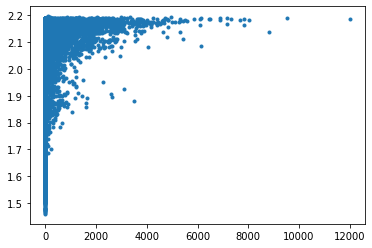

In [38]:
plt.plot(releases_params['gaba_releases_per_pre'],releases_params['atpi_mean'],'.')
plt.show()

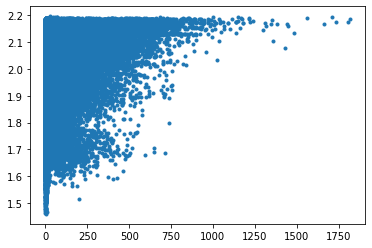

In [37]:
plt.plot(releases_params['glut_releases_received_per_post'],releases_params['atpi_mean'],'.')
plt.show()


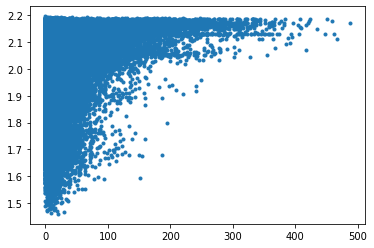

In [39]:
plt.plot(releases_params['gaba_releases_received_per_post'],releases_params['atpi_mean'],'.')
plt.show()


In [10]:
param['idxm'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [10]:
param.columns

Index(['c_gid', 'rank', 'idxm', 'ina_density', 'const_ksi',
       'voltages_per_gids', 'nais_mean', 'kis_mean', 'ik_density', 'const41',
       'pAKTPFK2', 'atpi_mean', 'atp_vm27', 'cais_mean', 'mito_scale',
       'glutamatergic_gaba_scaling', 'outs_r_to_met', 'current_ina_nA',
       'cells_volumes_um3', 'areas'],
      dtype='object')

In [18]:
param.loc[(param['c_gid']==2034) & (param['idxm']==0),['c_gid', 'rank', 'idxm','ina_density', 'const_ksi',
       'voltages_per_gids', 'nais_mean', 'kis_mean', 'ik_density', 'const41',
       'pAKTPFK2', 'atpi_mean', 'atp_vm27', 'cais_mean', 'mito_scale',
       'glutamatergic_gaba_scaling', 'outs_r_to_met']]

,c_gid,rank,idxm,ina_density,const_ksi,voltages_per_gids,nais_mean,kis_mean,ik_density,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met
1,2034,281,0,-0.111866,0.06,-62.122525,13.84435,136.652425,0.254691,4.1,0.17,0.03673,0.03673,0.000145,0.826873,0.1,0.005293
23094,2034,281,0,-0.111866,0.06,-62.122525,13.84435,136.652425,0.254691,4.1,0.17,0.03673,0.03673,0.000145,0.826873,0.1,0.005293


In [9]:
len(param.loc[param['idxm']==4,'c_gid'].unique())

22918

In [10]:
len(param.loc[param['idxm']==0,'c_gid'].unique())

22918

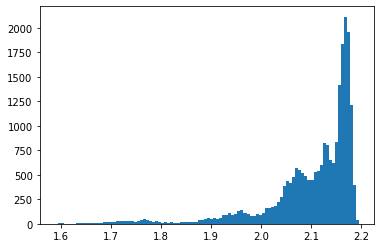

In [8]:
plt.hist(param.loc[param['idxm']==0,'atpi_mean'],bins=100)
plt.show()

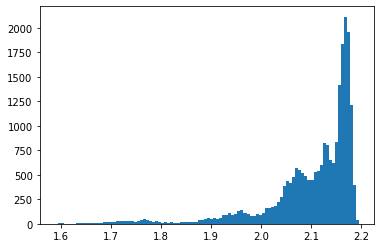

In [9]:
plt.hist(param.loc[param['idxm']==param['idxm'].min(),'atpi_mean'],bins=100)
plt.show()

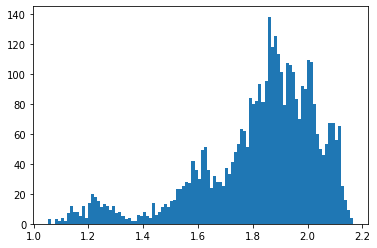

In [8]:
plt.hist(param.loc[param['idxm']==param['idxm'].max(),'atpi_mean'],bins=100)
plt.show()

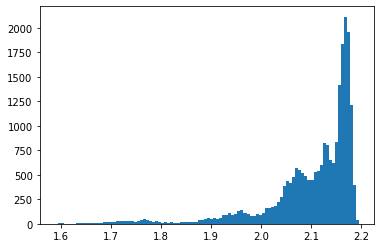

In [14]:
plt.hist(param.loc[param['idxm']==param['idxm'].min(),'atpi_mean'],bins=100)
plt.show()

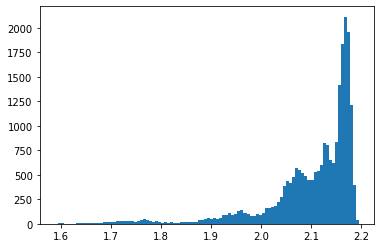

In [15]:
plt.hist(param.loc[param['idxm']==param['idxm'].min(),'atpi_mean'],bins=100)
plt.show()

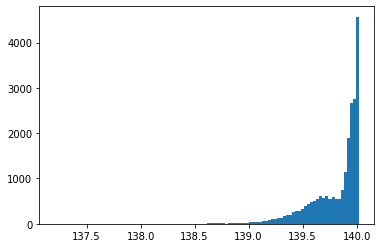

In [16]:
plt.hist(param.loc[param['idxm']==param['idxm'].min(),'kis_mean'],bins=100)
plt.show()

In [17]:
param.loc[param['idxm']==param['idxm'].min(),'ina_density'].min()

-0.6494022786824505

In [18]:
param.loc[param['idxm']==param['idxm'].min(),'ina_density'].max()

0.0018649522683104774

In [9]:
param.loc[param['idxm']==param['idxm'].max(),'ina_density'].min()

-0.499716756057096

In [10]:
param.loc[param['idxm']==param['idxm'].max(),'ina_density'].max()

0.001894324209227975

In [21]:
param.loc[param['idxm']==param['idxm'].max(),'ik_density'].min()

-0.002897809661244557

In [22]:
param.loc[param['idxm']==param['idxm'].max(),'ik_density'].max()

0.3983642211533552

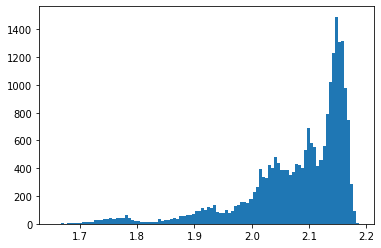

In [23]:
plt.hist(param.loc[param['idxm']==param['idxm'].max(),'atpi_mean'],bins=100)
plt.show()

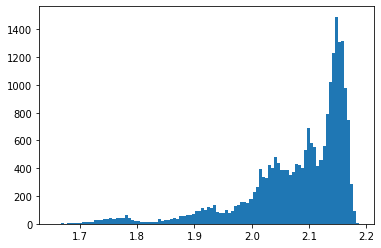

In [24]:
plt.hist(param.loc[param['idxm']==param['idxm'].max(),'atpi_mean'],bins=100)
plt.show()

In [25]:
param.loc[param['idxm']==param['idxm'].min(),'atpi_mean'].min()

1.5881300018991962

In [26]:
print(param.loc[(param['c_gid']==4390.0)&(param['idxm']==0),'atpi_mean'])
print(param.loc[(param['c_gid']==1079.0)&(param['idxm']==0),'atpi_mean'])

1686    2.052118
Name: atpi_mean, dtype: float64
381    2.069451
Name: atpi_mean, dtype: float64


In [27]:
param.loc[(param['c_gid']==4390.0)&(param['idxm']==0),:].values

array([[ 4.39000000e+03,  6.28000000e+02,  0.00000000e+00,
        -8.42105970e-02,  6.00000000e-02, -6.50000000e+01,
         1.01794756e+01,  1.39729606e+02,  7.33069703e-02,
         4.10000000e+00,  1.70000000e-01,  2.05211844e+00,
         2.18000000e+00,  1.04986984e-04,  8.26873385e-01,
         1.00000000e-01,  2.24834509e-06,  7.92018496e+03]])

In [30]:
len(param.loc[param['idxm']==99,'c_gid'].unique())

22908

In [11]:
len(param.loc[param['idxm']==param['idxm'].max(),'c_gid'].unique())

22556

In [16]:
param.loc[param['idxm']==param['idxm'].max()].head(20)

,c_gid,rank,idxm,ina_density,const_ksi,voltages_per_gids,nais_mean,kis_mean,ik_density,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,cells_volumes_um3
147108,148114,49,69,-0.062630,0.06,-65.0,11.582734,139.947240,0.005911,4.1,0.17,1.736857,2.1863,0.000220,0.742894,0.1,0.000000e+00,17078.638105
147109,148128,51,69,0.000070,0.06,-65.0,11.585744,139.961350,0.000125,4.1,0.17,1.754412,2.1863,0.000199,0.742894,0.1,0.000000e+00,16113.611285
147110,151042,458,69,-0.000217,0.06,-65.0,11.602268,139.861075,0.000100,4.1,0.17,1.735633,2.1863,0.000220,0.742894,0.1,3.214736e-07,8680.954333
147111,148195,65,69,0.000447,0.06,-65.0,11.580235,139.939552,-0.000211,4.1,0.17,1.754016,2.1863,0.000238,0.742894,0.1,3.859979e-07,21345.199957
147112,149781,279,69,0.000064,0.06,-65.0,11.617322,139.881139,0.000973,4.1,0.17,1.636039,2.1863,0.000292,0.742894,0.1,9.013600e-07,9288.290355
147113,149343,228,69,0.000077,0.06,-65.0,11.587246,139.934307,0.000186,4.1,0.17,1.648446,2.1863,0.000245,0.742894,0.1,2.522300e-07,21601.337830
147114,150354,369,69,-0.000177,0.06,-65.0,11.638197,139.866653,0.000546,4.1,0.17,1.702382,2.1863,0.000249,0.742894,0.1,3.678563e-07,9031.404809
147115,149872,297,69,-0.000241,0.06,-65.0,11.592831,139.927902,0.001062,4.1,0.17,1.725067,2.1863,0.000209,0.742894,0.1,3.489601e-07,14471.093172
147116,151648,542,69,-0.002068,0.06,-65.0,11.603540,139.899277,0.011657,4.1,0.17,1.732158,2.1863,0.000205,0.742894,0.1,7.209484e-07,9032.030812
147117,150108,338,69,0.000218,0.06,-65.0,11.600940,139.896754,0.000125,4.1,0.17,1.767812,2.1863,0.000204,0.742894,0.1,4.316935e-07,6464.535590


In [6]:
#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/ina_new_jorge/param_2021012010.txt",sep='\t',header=None)
#param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/param_test_nan2.txt",sep='\t',header=None) #test nan
param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/param_test_nan_5000.txt",sep='\t',header=None) #test nan

param.columns = ['c_gid','rank','idxm','current_ina','current_ina1','nais_mean']

param.loc[param['idxm']==max(param['idxm']),:]

,c_gid,rank,idxm,current_ina,current_ina1,nais_mean
10794378,3158.0,439,471,-0.019056,-0.064395,10.002578
10794379,3202.0,444,471,-0.008050,-0.016797,10.000747
10794380,109.0,11,471,0.016314,0.188948,9.973220
10794381,3322.0,460,471,-0.007736,-0.016639,10.000766
10794382,2213.0,307,471,-0.033918,-0.118520,10.002991
...,...,...,...,...,...,...
10817291,161689.0,816,471,-0.030368,-0.124771,10.001898
10817292,152727.0,705,471,-0.005355,-0.030395,10.000719
10817293,157516.0,208,471,-0.005214,-0.025134,10.000348
10817294,161007.0,699,471,-0.031440,-0.121032,10.001727


In [16]:
len(param.loc[param['idxm']==max(param['idxm']),'c_gid'].unique())

3895

In [33]:
param.loc[param['idxm']==max(param['idxm']),:]

,c_gid,rank,idxm,ina_density,const_ksi,voltages_per_gids,nais_mean,kis_mean,ik_density,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,cells_volumes_um3
1237169,15617,2188,54,0.001090,0.06,-65.0,11.456054,140.072657,-0.000934,4.1,0.17,2.088232,2.1863,0.000056,0.826873,0.1,0.000000e+00,3295.115055
1237170,15506,2170,54,0.000706,0.06,-65.0,11.475658,140.049799,-0.000269,4.1,0.17,2.044829,2.1863,0.000059,0.826873,0.1,0.000000e+00,3195.630326
1237171,15544,2177,54,-0.077480,0.06,-65.0,11.654954,139.834535,0.079284,4.1,0.17,1.829487,2.1863,0.000092,0.826873,0.1,1.251792e-06,5201.846779
1237172,15568,2180,54,-0.000063,0.06,-65.0,11.503220,140.014187,0.000465,4.1,0.17,1.943736,2.1863,0.000058,0.826873,0.1,0.000000e+00,3058.109227
1237173,15383,2163,54,0.000800,0.06,-65.0,11.614794,139.886611,0.003758,4.1,0.17,2.021717,2.1863,0.000086,0.826873,0.1,4.568504e-06,2676.130516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256708,148464,101,54,0.000012,0.06,-65.0,11.564642,139.977085,0.000043,4.1,0.17,2.095285,2.1863,0.000109,0.742894,0.1,0.000000e+00,20360.204012
1256709,160234,1734,54,-0.001690,0.06,-65.0,11.567886,139.982611,0.000612,4.1,0.17,2.164937,2.1863,0.000146,0.742894,0.1,0.000000e+00,19358.378284
1256710,148352,86,54,-0.006584,0.06,-65.0,11.574939,139.975101,0.016885,4.1,0.17,2.161185,2.1863,0.000146,0.742894,0.1,1.467097e-07,46196.062975
1256711,115227,16,54,0.000190,0.06,-65.0,11.490640,140.045249,-0.000022,4.1,0.17,2.037231,2.1863,0.000055,0.674419,0.1,4.264247e-08,3116.385213


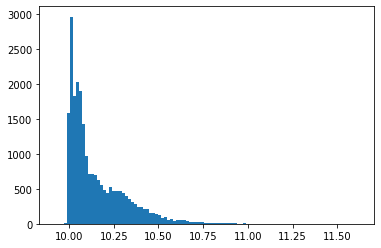

In [46]:
plt.hist(param.loc[param['idxm']==min(param['idxm']),'nais_mean'],bins=100)
plt.show()

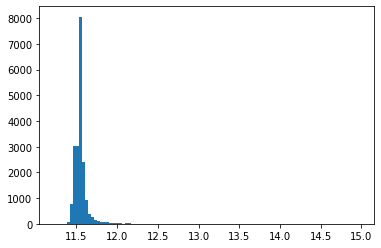

In [47]:
plt.hist(param.loc[param['idxm']==max(param['idxm']),'nais_mean'],bins=100)
plt.show()

In [96]:
param.loc[param['idxm']==max(param['idxm']),'outs_r_to_met'].max()

0.00016161465335690425

In [95]:
param.loc[param['idxm']==max(param['idxm']),'atpi_mean'].max()

1.4093311722048325

In [94]:
param.loc[param['idxm']==max(param['idxm']),'atpi_mean'].min()

0.8154849822698843

In [9]:
len(param.loc[param.isna().any(axis=1),'c_gid'].unique())

753

In [11]:
param.loc[param.isna().any(axis=1),'c_gid'].unique()

array([56121, 55216, 55336, 18543, 55886, 55313, 55421])

In [7]:
param.loc[param['kis_mean']==min(param['kis_mean']),:]

,c_gid,rank,idxm,current_density_ina,const_ksi,voltage_mean,nais_mean,kis_mean,current_density_ik,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,current_ina_nA,cells_volumes_um3,cells_areas_um2
62211,130142,336,20,-21.822247,0.06,-72.0,12.018749,139.547449,21.510449,4.1,0.17,2.198092,2.208237,0.000506,0.742894,1.0,0.000484,-5.266028,4160.725397,12881.839177


In [8]:
param.loc[param['nais_mean']==max(param['nais_mean']),:]

,c_gid,rank,idxm,current_density_ina,const_ksi,voltage_mean,nais_mean,kis_mean,current_density_ik,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,current_ina_nA,cells_volumes_um3,cells_areas_um2
62211,130142,336,20,-21.822247,0.06,-72.0,12.018749,139.547449,21.510449,4.1,0.17,2.198092,2.208237,0.000506,0.742894,1.0,0.000484,-5.266028,4160.725397,12881.839177


In [37]:
param[param.isna().any(axis=1)]

,c_gid,rank,idxm,current_density_ina,const_ksi,voltage_mean,nais_mean,kis_mean,current_density_ik,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,current_ina_nA,cells_volumes_um3,cells_areas_um2


In [6]:
param.loc[param.isna().any(axis=1),'c_gid'].unique()

array([56137, 56121])

In [55]:
param.loc[param.isna().any(axis=1),'c_gid'].unique()

array([55336, 18543, 56121, 87205])

In [13]:
param.idxm.max()

17

In [14]:
param.loc[param.isna().any(axis=1),'c_gid'].unique()

array([56121, 55216, 55336, 18543, 55886, 55313, 55421])

In [12]:
param[param.isna().any(axis=1)]

,c_gid,rank,idxm,ina_density,const_ksi,voltages_per_gids,nais_mean,kis_mean,ik_density,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,cells_volumes_um3
145893,56121,157,6,NaN,0.06,-65.0,NaN,NaN,NaN,4.1,0.17,NaN,2.1863,NaN,0.520672,1.0,3.946672e-08,5050.725403
169660,55216,38,7,NaN,0.06,-65.0,NaN,NaN,NaN,4.1,0.17,NaN,2.1863,NaN,0.520672,1.0,0.000000e+00,5066.753253
170010,55336,53,7,NaN,0.06,-65.0,NaN,NaN,NaN,4.1,0.17,NaN,2.1863,NaN,0.520672,1.0,0.000000e+00,3332.710804
280087,18543,31,12,NaN,0.06,-65.0,NaN,NaN,NaN,4.1,0.17,NaN,2.1863,NaN,0.826873,1.0,0.000000e+00,2178.240077
284827,55886,126,12,NaN,0.06,-65.0,NaN,NaN,NaN,4.1,0.17,NaN,2.1863,NaN,0.520672,1.0,0.000000e+00,5050.725403
284938,55313,48,12,NaN,0.06,-65.0,NaN,NaN,NaN,4.1,0.17,NaN,2.1863,NaN,0.520672,1.0,0.000000e+00,3403.798672
305524,55421,64,13,NaN,0.06,-65.0,NaN,NaN,NaN,4.1,0.17,NaN,2.1863,NaN,0.520672,1.0,1.446890e-08,4592.274520


In [7]:
param[param.isna().any(axis=1)]

,c_gid,rank,idxm,current_density_ina,const_ksi,voltage_mean,nais_mean,kis_mean,current_density_ik,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,current_ina_nA,cells_volumes_um3,cells_areas_um2
35874,56137,162,1,NaN,0.06,NaN,NaN,NaN,NaN,4.1,0.17,NaN,1.4,NaN,0.520672,1.0,0.000000,NaN,4956.376235,9140.267028
52188,56137,162,2,NaN,0.06,NaN,NaN,NaN,NaN,4.1,0.17,NaN,1.4,NaN,0.520672,1.0,0.000001,NaN,4956.376235,9140.267028
54461,56121,157,2,NaN,0.06,NaN,NaN,NaN,NaN,4.1,0.17,NaN,1.4,NaN,0.520672,1.0,0.000001,NaN,5050.725403,9497.462217
76890,56137,162,3,NaN,0.06,NaN,NaN,NaN,NaN,4.1,0.17,NaN,1.4,NaN,0.520672,1.0,0.000000,NaN,4956.376235,9140.267028
82048,56121,157,3,NaN,0.06,NaN,NaN,NaN,NaN,4.1,0.17,NaN,1.4,NaN,0.520672,1.0,0.000001,NaN,5050.725403,9497.462217


In [69]:
param[param.isna().any(axis=1)]

,c_gid,rank,idxm,current_density_ina,const_ksi,voltage_mean,nais_mean,kis_mean,current_density_ik,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,current_ina_nA,cells_volumes_um3,cells_areas_um2


In [68]:
param.loc[param['outs_r_to_met']==max(param['outs_r_to_met']),:]

,c_gid,rank,idxm,current_density_ina,const_ksi,voltage_mean,nais_mean,kis_mean,current_density_ik,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,current_ina_nA,cells_volumes_um3,cells_areas_um2
376863,87996,2077,160,0.036139,0.06,-65.0,11.596246,139.956533,0.317748,4.1,0.17,1.419937,1.428493,0.00006,0.520672,1.0,0.011002,0.017807,1288.153208,4212.268895


In [8]:
param.loc[param['nais_mean']==max(param['nais_mean']),:]

,c_gid,rank,idxm,current_density_ina,const_ksi,voltage_mean,nais_mean,kis_mean,current_density_ik,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,current_ina_nA,cells_volumes_um3,cells_areas_um2
227333,92718,157,9,-104.338894,0.06,-12.535397,10.969149,138.713952,117.284909,4.1,0.17,1.366798,1.419537,0.000276,1.0,0.1,0.003402,-11.532839,586.004034,3681.584575


In [9]:
param.loc[param['kis_mean']==min(param['kis_mean']),:]

,c_gid,rank,idxm,current_density_ina,const_ksi,voltage_mean,nais_mean,kis_mean,current_density_ik,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,current_ina_nA,cells_volumes_um3,cells_areas_um2
150826,93430,256,6,-15.815028,0.06,-35.986005,10.73897,138.698386,14.382237,4.1,0.17,1.375287,1.416822,0.00025,1.0,0.1,0.006165,-2.745998,1251.255387,4459.552963


In [12]:
min(param['kis_mean'])

138.69838577345615

In [10]:
5.0 - 1.33 * (min(param['kis_mean']) - 140.0 )  # u8

5.714098366387836

In [17]:
param.loc[(param['kis_mean']==min(param.loc[param['idxm']==0,'kis_mean'])) & (param['idxm']==0) ,:]

,c_gid,rank,idxm,current_density_ina,const_ksi,voltage_mean,nais_mean,kis_mean,current_density_ik,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,current_ina_nA,cells_volumes_um3,cells_areas_um2
12271,88426,858,0,-2.755415,0.06,-47.976741,15.521458,130.453853,1.037219,4.1,0.17,1.160378,1.4,0.000633,1.0,0.1,0.013269,-0.627201,2042.5965,4893.765259


In [15]:
param.loc[(param['atpi_mean']==min(param.loc[param['idxm']==0,'atpi_mean'])) & (param['idxm']==0) ,:]

,c_gid,rank,idxm,current_density_ina,const_ksi,voltage_mean,nais_mean,kis_mean,current_density_ik,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,current_ina_nA,cells_volumes_um3,cells_areas_um2
15056,109787,21,0,-0.00088,0.06,-70.992437,10.000356,139.999984,-0.040194,4.1,0.17,1.257457,1.4,0.00005,1.0,0.1,0.0,-0.001489,4355.671794,12407.469682


In [16]:
len(param.loc[param['nais_mean']>15,'c_gid'].unique())/len(param['c_gid'].unique())

0.0

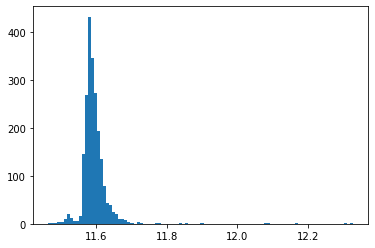

In [17]:
plt.hist(param.loc[param['idxm']==param['idxm'].max(),'nais_mean'],bins=100)
plt.show()


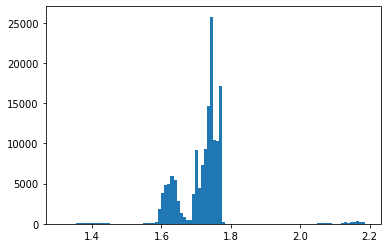

In [19]:
plt.hist(param['atpi_mean'],bins=100)
plt.show()


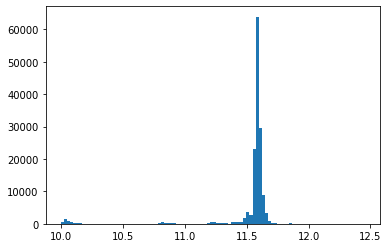

In [20]:
plt.hist(param['nais_mean'],bins=100)
plt.show()


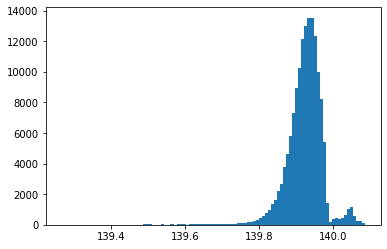

In [21]:
plt.hist(param['kis_mean'],bins=100)
plt.show()


In [25]:
param.loc[param['kis_mean']==min(param['kis_mean']),:]

,c_gid,rank,idxm,current_density_ina,const_ksi,voltage_mean,nais_mean,kis_mean,current_density_ik,const41,pAKTPFK2,atpi_mean,atp_vm27,cais_mean,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met,current_ina_nA,cells_volumes_um3,cells_areas_um2
12271,88426,858,0,-2.755415,0.06,-47.976741,15.521458,130.453853,1.037219,4.1,0.17,1.160378,1.4,0.000633,1.0,0.1,0.013269,-0.627201,2042.5965,4893.765259


In [12]:
#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen_nostim_um_2021021916.txt",sep='\t',header=None)
um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/gen5_um_2021022511.txt",sep='\t',header=None)


#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_gen_nostim_v22_20jan2021.txt",sep='\t',header=None)

#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_memTest_2021020323.txt",sep='\t',header=None)
#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_gen_nostim_v2_25jan2021.txt",sep='\t',header=None)


#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/um_gen_nostim_v2_20jan2021.txt",sep='\t',header=None)
#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/results/um_gen_freq_coupl_ms_14jan2021.txt",sep=', ',header=None)

um.columns = ['c_gid','rank','idxm','VNeu0','m0','h0','n0','Conc_Cl_out','Conc_Cl_in', 'Na0in','K0out','Glc_b','Lac_b','O2_b','Q0','Glc_ecs','Lac_ecs','O2_ecs','O2_n',
              'O2_a','Glc_n','Glc_a',
              'Lac_n','Lac_a','Pyr_n','Pyr_a','PCr_n','PCr_a','Cr_n','Cr_a','ATP_n','ATP_a','ADP_n','ADP_a','NADH_n','NADH_a','NAD_n','NAD_a','ksi0','ksi02']


In [173]:
um.loc[(um['c_gid'].isin([ 15859,   5564,  16948,   4149,  99720,  86072, 108232, 113002]))&(um['idxm']==um['idxm'].max()-1),]

,c_gid,rank,idxm,VNeu0,m0,h0,n0,Conc_Cl_out,Conc_Cl_in,Na0in,K0out,Glc_b,Lac_b,O2_b,Q0,Glc_ecs,Lac_ecs,O2_ecs,O2_n,O2_a,Glc_n,Glc_a,Lac_n,Lac_a,Pyr_n,Pyr_a,PCr_n,PCr_a,Cr_n,Cr_a,ATP_n,ATP_a,ADP_n,ADP_a,NADH_n,NADH_a,NAD_n,NAD_a,ksi0,ksi02
84,4149,591,0,-80.0,0.002110,0.9002,0.1558,140.0,8.0,10.507128,6.188685,4.508925,1.239865,6.666962,0.0067,1.190186,1.299949,0.041611,0.030286,0.029857,1.190061,0.650233,1.29987,1.300162,0.38001,0.349867,10.330218,10.320417,0.000082,0.000683,2.18518,2.167056,0.00112,0.015944,0.001145,0.001149,0.030055,0.030051,0.06,0.06
649,15859,2225,0,-80.0,0.002110,0.9002,0.1558,140.0,8.0,10.307621,5.541959,4.508925,1.239865,6.666962,0.0067,1.190186,1.299948,0.041611,0.030286,0.029861,1.190061,0.650235,1.29987,1.300160,0.38001,0.349867,10.330218,10.320422,0.000082,0.000678,2.18518,2.167184,0.00112,0.015816,0.001145,0.001149,0.030055,0.030051,0.06,0.06
3251,16948,2392,0,-80.0,0.002110,0.9002,0.1558,140.0,8.0,10.142932,5.227662,4.508925,1.239865,6.666962,0.0067,1.190186,1.299948,0.041611,0.030286,0.029862,1.190061,0.650236,1.29987,1.300159,0.38001,0.349868,10.330218,10.320424,0.000082,0.000676,2.18518,2.167235,0.00112,0.015765,0.001145,0.001149,0.030055,0.030051,0.06,0.06
3414,5564,787,0,-80.0,0.002110,0.9002,0.1558,140.0,8.0,10.378021,5.730867,4.508925,1.239865,6.666962,0.0067,1.190186,1.299948,0.041611,0.030286,0.029860,1.190061,0.650235,1.29987,1.300160,0.38001,0.349867,10.330218,10.320421,0.000082,0.000679,2.18518,2.167155,0.00112,0.015845,0.001145,0.001149,0.030055,0.030051,0.06,0.06
15337,108232,2347,0,-72.0,0.006178,0.9002,0.1558,140.0,8.0,10.196887,5.353876,4.508925,1.239865,6.666962,0.0067,1.190186,1.299948,0.041611,0.030286,0.029862,1.190061,0.650235,1.29987,1.300160,0.38001,0.349867,10.330218,10.320423,0.000082,0.000677,2.18518,2.167215,0.00112,0.015785,0.001145,0.001149,0.030055,0.030051,0.06,0.06
16466,86072,1810,0,-72.0,0.006178,0.9002,0.1558,140.0,8.0,10.196369,5.365682,4.508925,1.239865,6.666962,0.0067,1.190186,1.299948,0.041611,0.030286,0.029862,1.190061,0.650235,1.29987,1.300160,0.38001,0.349867,10.330218,10.320423,0.000082,0.000677,2.18518,2.167213,0.00112,0.015787,0.001145,0.001149,0.030055,0.030051,0.06,0.06
16683,99720,1161,0,-72.0,0.006178,0.9002,0.1558,140.0,8.0,10.376850,5.812220,4.508925,1.239865,6.666962,0.0067,1.190186,1.299948,0.041611,0.030286,0.029859,1.190061,0.650234,1.29987,1.300161,0.38001,0.349867,10.330218,10.320420,0.000082,0.000680,2.18518,2.167135,0.00112,0.015865,0.001145,0.001149,0.030055,0.030051,0.06,0.06
17018,113002,447,0,-80.0,0.002110,0.9002,0.1558,140.0,8.0,10.245355,5.603906,4.508925,1.239865,6.666962,0.0067,1.190186,1.299948,0.041611,0.030286,0.029860,1.190061,0.650235,1.29987,1.300160,0.38001,0.349867,10.330218,10.320421,0.000082,0.000679,2.18518,2.167173,0.00112,0.015827,0.001145,0.001149,0.030055,0.030051,0.06,0.06


In [101]:
print(um.loc[(um['c_gid']==4390.0)&(um['idxm']==0),'ATP_n'])
print(um.loc[(um['c_gid']==1079.0)&(um['idxm']==0),'ATP_n'])

2452    1.404691
Name: ATP_n, dtype: float64
259    1.368583
Name: ATP_n, dtype: float64


In [104]:
um['idxm'].max()

3

In [108]:
um.loc[(um['c_gid']==4390.0)&(um['idxm']==um['idxm'].max()),'ATP_n']

69817    1.103736
Name: ATP_n, dtype: float64

In [107]:
um.loc[(um['c_gid']==1079.0)&(um['idxm']==um['idxm'].max()),'ATP_n']

69809    0.975686
Name: ATP_n, dtype: float64

In [106]:
um['idxm'].max()

3

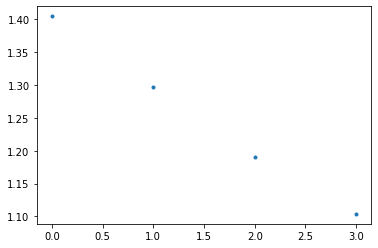

In [109]:
plt.plot(um.loc[um['c_gid']==4390.0,'idxm'],um.loc[um['c_gid']==4390.0,'ATP_n'],'.')
plt.show()

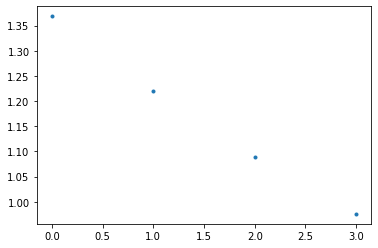

In [110]:
#fig = plt.figure(figsize=(12,8))
plt.plot(um.loc[um['c_gid']==1079,'idxm'],um.loc[um['c_gid']==1079,'ATP_n'],'.')
plt.show()

In [24]:
um.head()

,c_gid,rank,idxm,VNeu0,m0,h0,n0,Conc_Cl_out,Conc_Cl_in,Na0in,K0out,Glc_b,Lac_b,O2_b,Q0,Glc_ecs,Lac_ecs,O2_ecs,O2_n,O2_a,Glc_n,Glc_a,Lac_n,Lac_a,Pyr_n,Pyr_a,PCr_n,PCr_a,Cr_n,Cr_a,ATP_n,ATP_a,ADP_n,ADP_a,NADH_n,NADH_a,NAD_n,NAD_a,ksi0,ksi02
0,48.0,7,0,-73.0,0.00541,0.9002,0.1558,140.0,8.0,11.5604,6.277222,4.499670,1.242381,6.639458,0.0067,1.178204,1.330691,0.037083,0.012967,0.026079,1.177795,0.650231,1.333462,1.329660,0.330137,0.347221,10.328241,10.319939,2.059263e-03,0.001161,1.403605,1.395859,0.026554,0.017141,0.001316,0.001182,0.029884,0.030018,0.06,0.06
1,3.0,1,0,-73.0,0.00541,0.9002,0.1558,140.0,8.0,11.5604,6.277229,4.499793,1.240598,6.640807,0.0067,1.186379,1.311501,0.040817,0.025437,0.026904,1.186263,0.650273,1.311319,1.312003,0.361350,0.347264,10.330300,10.319951,2.391402e-07,0.001149,1.429985,1.396055,0.000002,0.016945,0.001203,0.001167,0.029997,0.030033,0.06,0.06
2,31.0,5,0,-73.0,0.00541,0.9002,0.1558,140.0,8.0,11.5604,6.277226,4.499744,1.241361,6.639973,0.0067,1.183655,1.318274,0.038758,0.020111,0.026408,1.183533,0.650254,1.318239,1.318680,0.349449,0.347210,10.330279,10.319943,2.056777e-05,0.001157,1.429775,1.395918,0.000167,0.017082,0.001242,0.001173,0.029958,0.030027,0.06,0.06
3,2096.0,294,0,-73.0,0.00541,0.9002,0.1558,140.0,8.0,11.5604,6.276936,4.499517,1.244108,6.639105,0.0067,1.166613,1.349733,0.036392,0.010801,0.025876,1.165139,0.650211,1.357321,1.346450,0.319114,0.347323,10.144330,10.319946,1.859697e-01,0.001154,0.582542,1.395966,1.146833,0.017034,0.001378,0.001195,0.029822,0.030005,0.06,0.06
4,2072.0,290,0,-73.0,0.00541,0.9002,0.1558,140.0,8.0,11.5604,6.277213,4.499527,1.243996,6.639119,0.0067,1.167350,1.348623,0.036413,0.010852,0.025872,1.165931,0.650199,1.355985,1.345449,0.319465,0.347304,10.237251,10.319941,9.304906e-02,0.001159,0.744812,1.395893,0.725356,0.017107,0.001375,0.001195,0.029825,0.030005,0.06,0.06


In [25]:
um.loc[um['ATP_n']==min(um['ATP_n']),]

,c_gid,rank,idxm,VNeu0,m0,h0,n0,Conc_Cl_out,Conc_Cl_in,Na0in,K0out,Glc_b,Lac_b,O2_b,Q0,Glc_ecs,Lac_ecs,O2_ecs,O2_n,O2_a,Glc_n,Glc_a,Lac_n,Lac_a,Pyr_n,Pyr_a,PCr_n,PCr_a,Cr_n,Cr_a,ATP_n,ATP_a,ADP_n,ADP_a,NADH_n,NADH_a,NAD_n,NAD_a,ksi0,ksi02
204947,134021.0,354,8,-73.0,0.00541,0.9002,0.1558,140.0,8.0,11.5604,6.229896,4.438183,1.405213,6.416076,0.0067,1.061384,1.617234,0.024994,0.003447,0.012097,1.060724,0.620893,1.618466,1.618153,0.059266,0.24726,9.758503,10.318309,0.571797,0.002791,0.201239,1.372591,1.272303,0.040409,0.006484,0.001929,0.024716,0.029271,0.06,0.06


In [26]:
len(um.loc[um['idxm']==um['idxm'].min(),'c_gid'].unique())

22918

In [57]:
um['idxm'].max()

9

In [73]:
survived = um.loc[um['idxm']==um['idxm'].max(),'c_gid'].unique()

bad_gids = um.loc[~um['c_gid'].isin(survived),'c_gid'].unique()

In [74]:
len(bad_gids)

20818

In [75]:
len(survived)

2100

In [76]:
len(um.loc[um['idxm']==um['idxm'].max(),'c_gid'].unique())

2100

In [77]:
survived[0]

1079.0

In [78]:
bad_gids[0]

4390.0

In [28]:
um.loc[um['idxm']==um['idxm'].max(),:].head()

,c_gid,rank,idxm,VNeu0,m0,h0,n0,Conc_Cl_out,Conc_Cl_in,Na0in,K0out,Glc_b,Lac_b,O2_b,Q0,Glc_ecs,Lac_ecs,O2_ecs,O2_n,O2_a,Glc_n,Glc_a,Lac_n,Lac_a,Pyr_n,Pyr_a,PCr_n,PCr_a,Cr_n,Cr_a,ATP_n,ATP_a,ADP_n,ADP_a,NADH_n,NADH_a,NAD_n,NAD_a,ksi0,ksi02
206262,1079.0,145,9,-73.0,0.00541,0.9002,0.1558,140.0,8.0,11.5604,6.278331,4.433187,1.420955,6.397458,0.0067,1.054902,1.635596,0.024778,0.003380,0.011906,1.054262,0.611660,1.636947,1.636153,0.057557,0.230460,9.825201,10.319037,0.505099,0.002063,0.231649,1.383092,1.284998,0.029908,0.006687,0.002075,0.024513,0.029125,0.06,0.06
206263,1061.0,141,9,-73.0,0.00541,0.9002,0.1558,140.0,8.0,11.5604,6.276253,4.433280,1.420741,6.397411,0.0067,1.055384,1.636248,0.024663,0.003367,0.011425,1.054745,0.609875,1.637369,1.637240,0.057507,0.229128,9.826455,10.317994,0.503845,0.003106,0.228483,1.368185,1.264112,0.044815,0.006693,0.002088,0.024507,0.029112,0.06,0.06
206264,1877.0,264,9,-73.0,0.00541,0.9002,0.1558,140.0,8.0,11.5604,6.276364,4.433081,1.421727,6.397338,0.0067,1.054335,1.637867,0.024655,0.003365,0.011407,1.053696,0.609568,1.638987,1.638866,0.057519,0.229029,9.787734,10.317976,0.542566,0.003124,0.229174,1.367936,1.370998,0.045064,0.006697,0.002090,0.024503,0.029110,0.06,0.06
206265,635.0,78,9,-73.0,0.00541,0.9002,0.1558,140.0,8.0,11.5604,6.277108,4.433194,1.420987,6.397434,0.0067,1.054925,1.636607,0.024669,0.003367,0.011448,1.054286,0.610184,1.637738,1.637580,0.057525,0.229478,9.816751,10.318052,0.513549,0.003048,0.227536,1.369008,1.284433,0.043992,0.006693,0.002085,0.024507,0.029115,0.06,0.06
206266,3100.0,433,9,-73.0,0.00541,0.9002,0.1558,140.0,8.0,11.5604,6.276548,4.433186,1.421146,6.397400,0.0067,1.054885,1.636884,0.024663,0.003366,0.011424,1.054246,0.609895,1.638005,1.637877,0.057522,0.229232,9.812383,10.317992,0.517917,0.003108,0.227105,1.368163,1.293497,0.044837,0.006694,0.002087,0.024506,0.029113,0.06,0.06


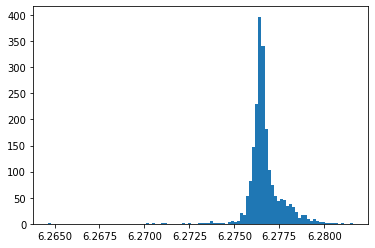

In [29]:
plt.hist(um.loc[um['idxm']==um['idxm'].max(),'K0out'],bins=100)
plt.show()

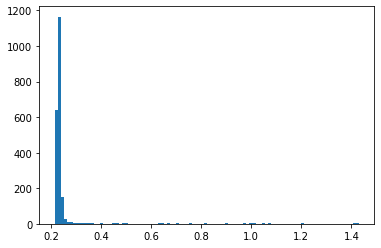

In [30]:
plt.hist(um.loc[um['idxm']==um['idxm'].max(),'ATP_n'],bins=100)
plt.show()

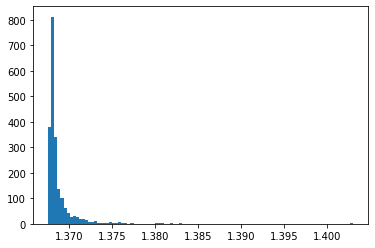

In [31]:
plt.hist(um.loc[um['idxm']==um['idxm'].max(),'ATP_a'],bins=100)
plt.show()

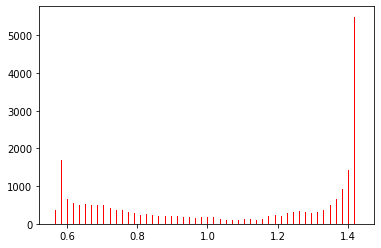

In [32]:
colors = ['red','orange','green','blue','pink']
plt.hist([um.loc[um['idxm']==0,'ATP_n'],um.loc[um['idxm']==10,'ATP_n'],um.loc[um['idxm']==30,'ATP_n'],um.loc[um['idxm']==50,'ATP_n'],um.loc[um['idxm']==90,'ATP_n']],
         bins=50,color=colors, label=um['idxm'].unique())
plt.show()


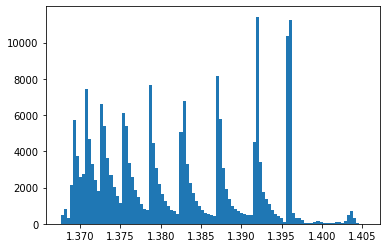

In [33]:
plt.hist(um['ATP_a'],bins=100)
plt.show()

In [70]:
mc2_cells = mc2_cells.reset_index()

dfglut = pd.merge(glut, mc2_cells, left_on = 'c_gid',right_on='index',how='inner')

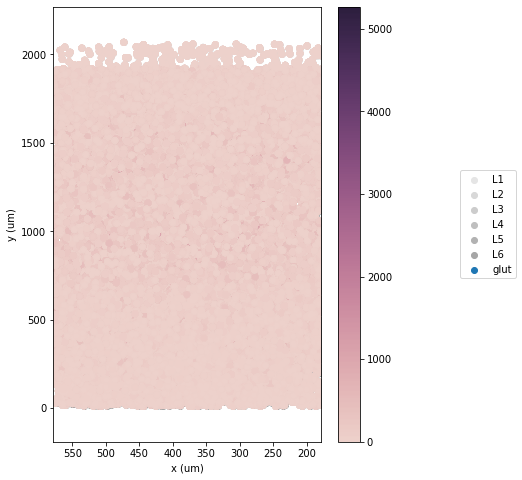

In [71]:
vmin=np.min(dfglut['releases'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())
vmax=np.max(dfglut['releases'].tolist()) #+ l5mc_feat_mean['diff_ATP_n'].tolist())

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots(figsize=(6, 8))

#ax1 = ax.scatter(dfglut[Cell.X], dfglut[Cell.Y], color='gray', label='') 

x_min = dfglut[Cell.X].max()
x_max = dfglut[Cell.X].min()

y_min = dfglut[Cell.Y].min() 
y_max = dfglut[Cell.Y].max()


ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==1),Cell.X], mc2_cells.loc[(mc2_cells['layer']==1),Cell.Y], color='#e5e5e5', label='L1')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==2),Cell.X], mc2_cells.loc[(mc2_cells['layer']==2),Cell.Y],  color='#d8d8d8', label='L2')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==3),Cell.X], mc2_cells.loc[(mc2_cells['layer']==3),Cell.Y], color='#cccccc', label='L3')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==4),Cell.X], mc2_cells.loc[(mc2_cells['layer']==4),Cell.Y],  color='#bfbfbf', label='L4')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==5),Cell.X], mc2_cells.loc[(mc2_cells['layer']==5),Cell.Y],  color='#b2b2b2', label='L5')
ax1 = ax.scatter(mc2_cells.loc[(mc2_cells['layer']==6),Cell.X], mc2_cells.loc[(mc2_cells['layer']==6),Cell.Y],  color='#a6a6a6', label='L6') 


#ax = plt.plot(l5tpca_feat[Cell.X], l5tpca_feat[Cell.Y], '.', color='#f69235', label='L5_TPC:A')
#ax = plt.plot(l5mc_feat[Cell.X], l5mc_feat[Cell.Y], '.', color='#1b80dd', label='L5_MC') 

ax2 = ax.scatter(dfglut[Cell.X], 
                 dfglut[Cell.Y], 
                 c=dfglut['releases'], vmin=vmin, vmax=vmax, cmap=cmap, label='glut')


plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('x (um)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+200])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()

#fig.savefig('plots/glut_releases_column.png',dpi=300, bbox_inches='tight', transparent=False)
